#**CSE555 - Intro to Pattern Recognition Final Report**

#NAMAN PUNDIR
####namanpun@buffalo.edu | 50373843 | University at Buffalo

###**Topic: Emotional Intelligence**
#####Face and Facial Expression Detection and Conversion Into Electronic Ideogram to extract information.

##**Abstract:**
Electronic graphical representation or Ideogram Emojis or avatars are ways to indicate the behavior and expression of a person. These representations have become an essential part of online chatting, product review, brand emotion, video calls, social media and many more. In the current world it also leads to a good way to communicate emotions, something that word can not portray.  Emojis are meant to be fun, light-hearted, and convey a broad range of emotions efficiently and in a way that words sometimes cannot.

With advancements in computer vision and pattern recognition, it is now possible to detect human emotions from images, videos and live stream. In this project, we will detect human faces and  classify human facial expressions to filter and map corresponding electronic representation or ideogram emojis or avatars.



##**Index:**
1. Dataset
2. Deep Learning Algorithm
3. Machine Learning and Pattern Recognition Topics
4. Python Modules
5. Computer Vision Modules
6. Source Code
7. Results
8. Duscussion and Challenges
9. Future Work
10. References
11. Ethics Essay

##**Dataset:**
In this project I will be using FER2013 dataset(Facial Expression Recognition).
FER2013 is the face image dataset which comprises of 35,685 examples of 48x48 GrayScale images of faces. 
Images are categorized based on the emoition shown in the facial expression:
######-Happiness
######-Neutral
######-Sadness
######-Anger
######-Surprise
######-Disgust
######-Fear

These are the **most** common expression by human faces.
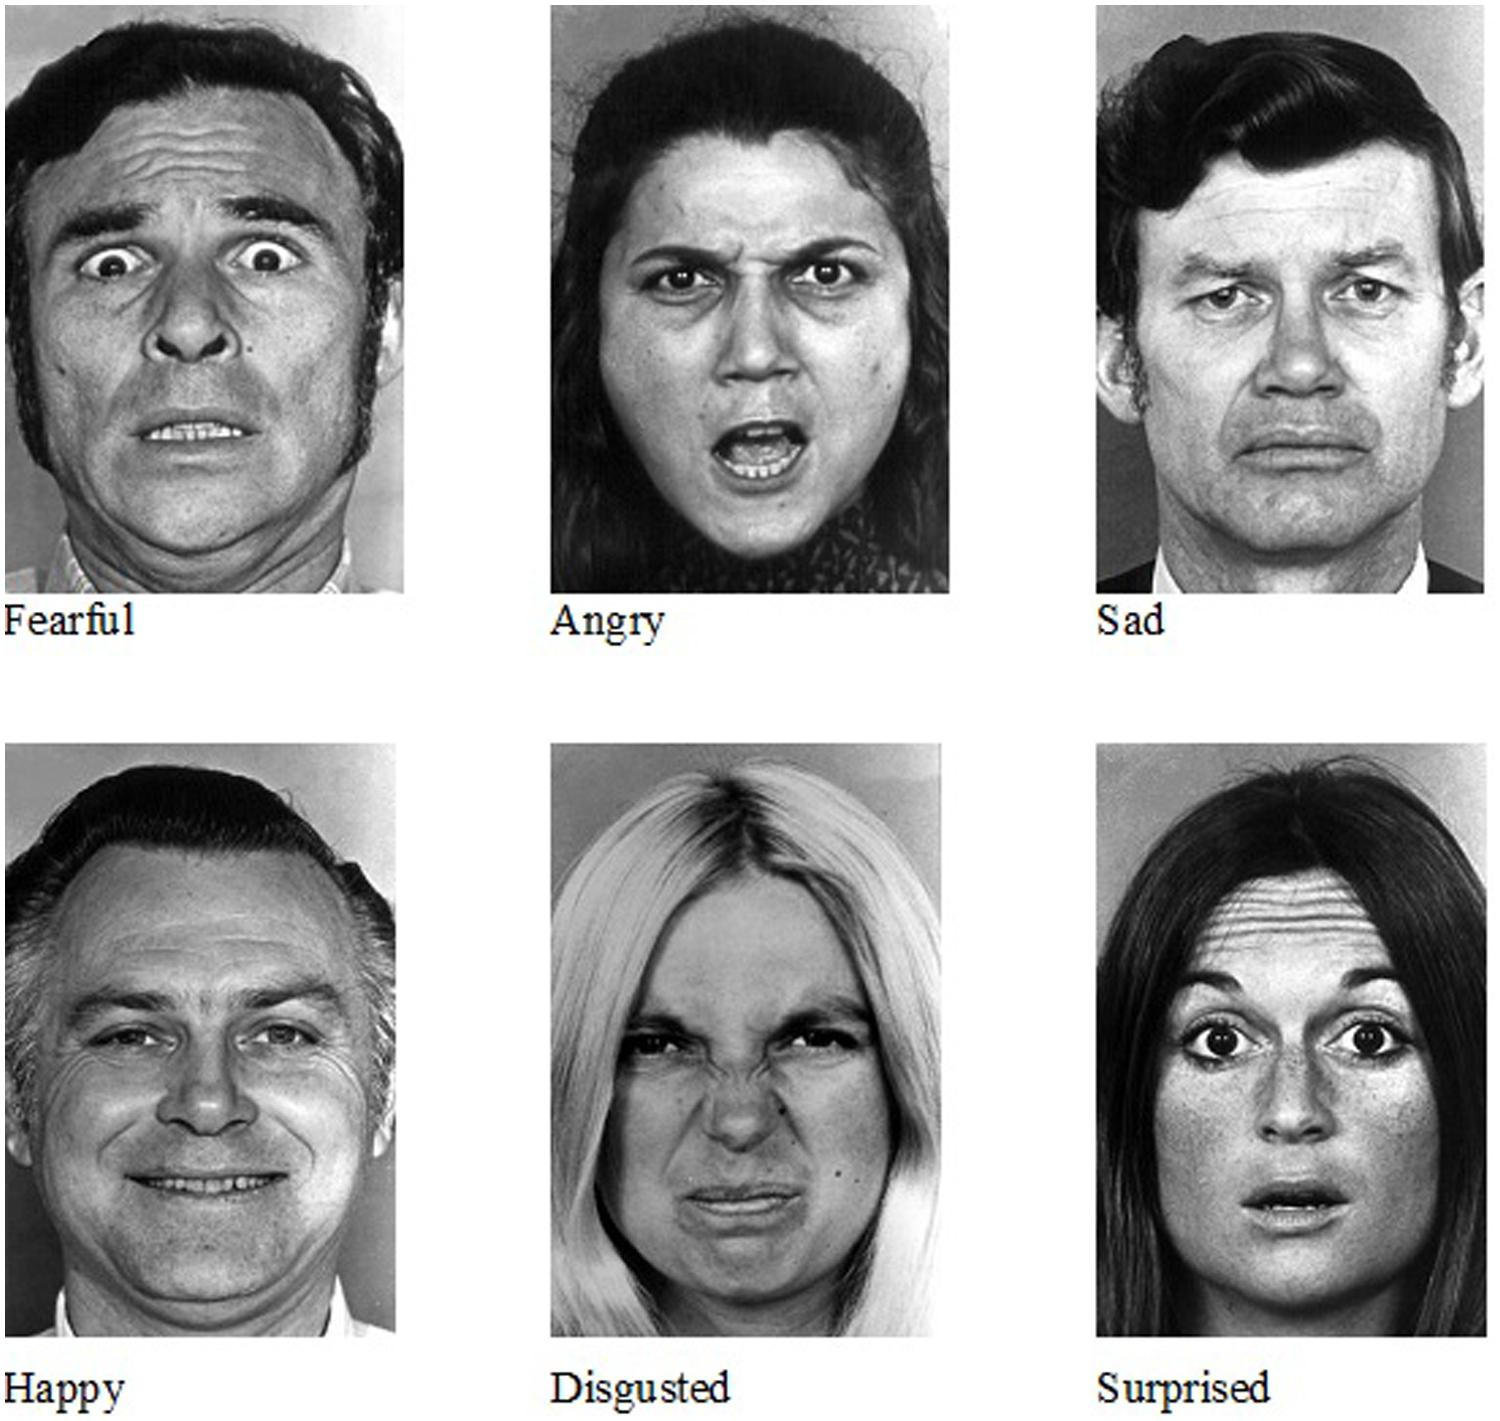

###**EMOJI DATASET:**
I used my **SNAPCHAT Bitmoji** to make emoji dataset. 
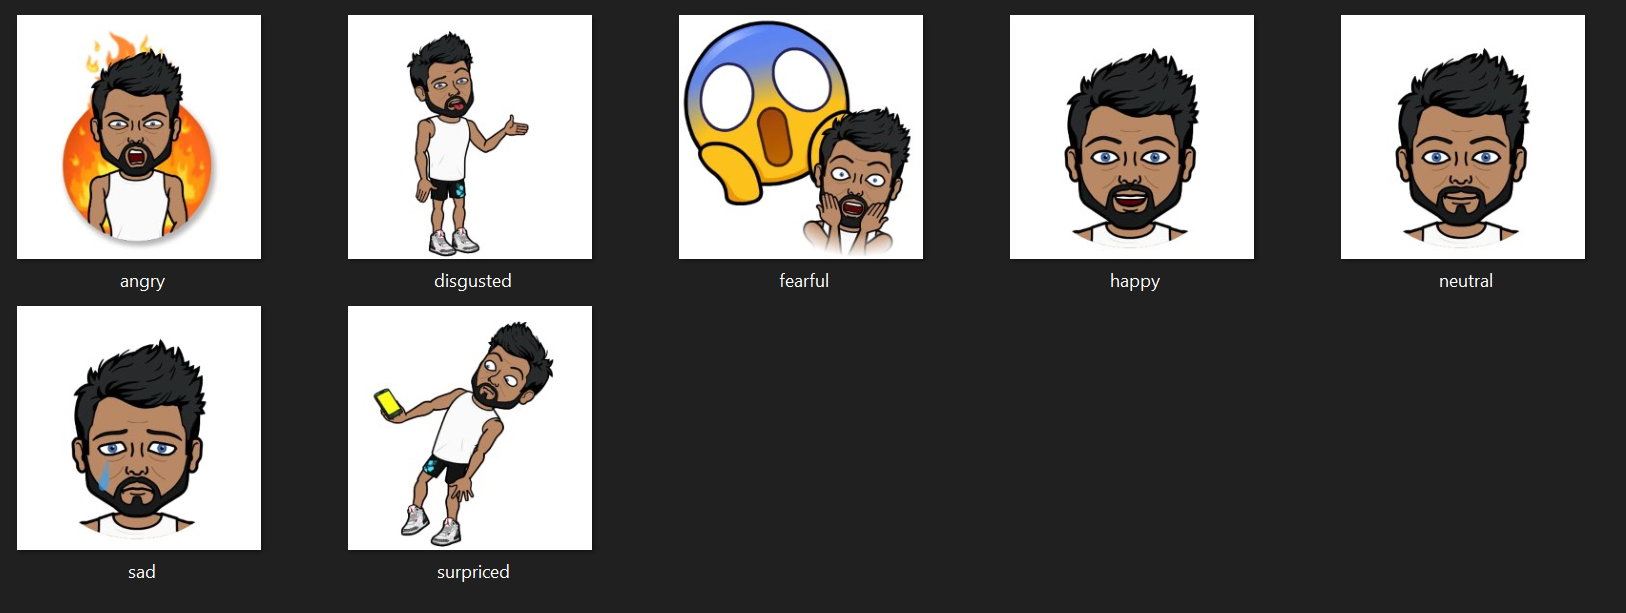

##**Deep Learning Algorithm**
####Convolution Neural Network:
In deep learning, a convolutional neural network is a class of deep neural networks, most commonly applied to analyzing visual imagery.

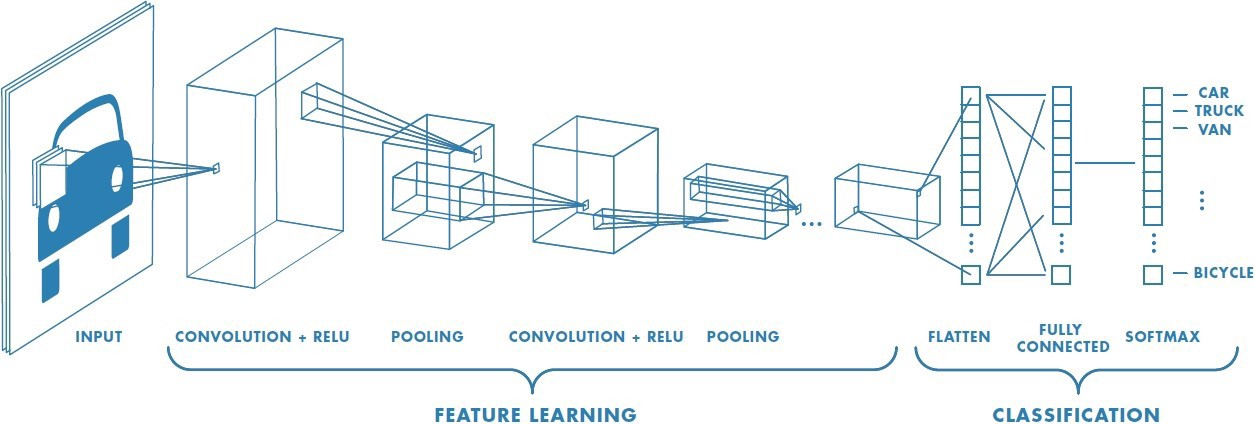

###**Tensorflow:**
TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. Tensorflow is a symbolic math library based on dataflow and differentiable programming.
####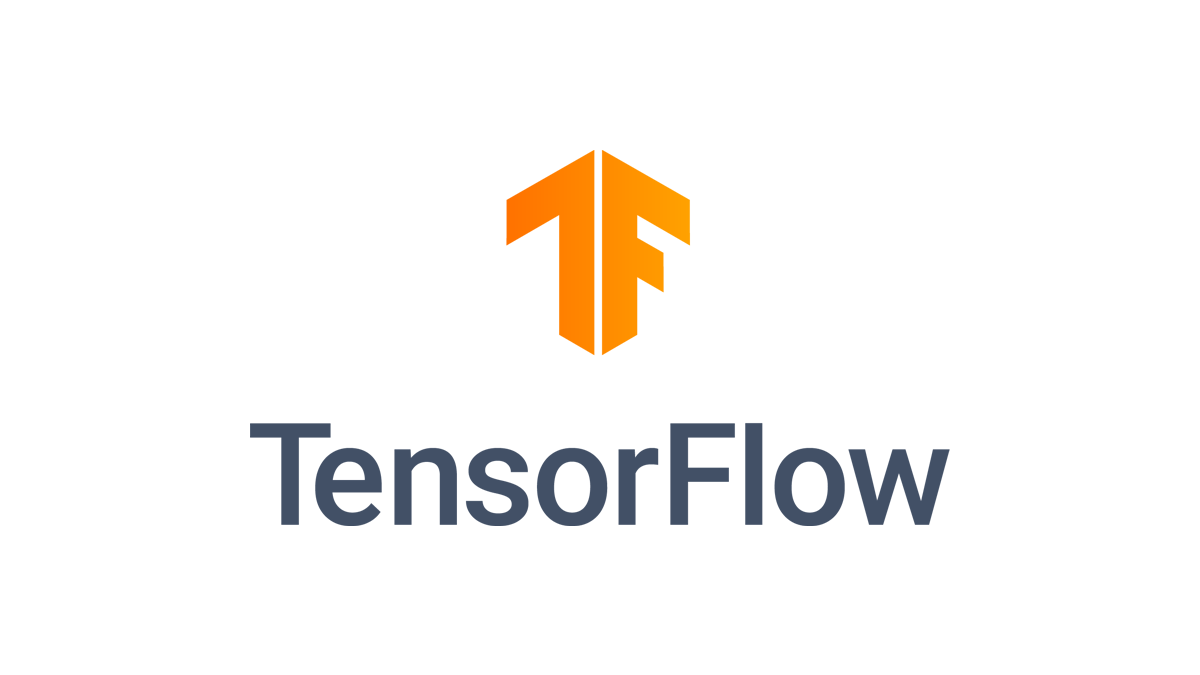

##**Machine Learning and Pattern Recognition Topics:**
####Some of the topics we will be using are following:
######**Classification:**
classification is a supervised learning concept which basically categorizes a set of data into classes. The most common classification problems are – speech recognition, face detection, handwriting recognition, document classification, etc.

######**Sequential:**
Sequence Modeling is the task of predicting what word/letter comes next. Unlike the FNN and CNN, in sequence modeling, the current output is dependent on the previous input and the length of the input is not fixed.

######**Activation Functions:**
the activation function of a node defines the output of that node given an input or set of inputs. A standard integrated circuit can be seen as a digital network of activation functions that can be "ON" (1) or "OFF" (0), depending on input.

######**In this project I will be using plenty of Machine Learning and Pattern recognition topics.**


##**Python Modules:**
######**Numpy:**
NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

######**Keras:**
Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. 

######**Pandas:**
pandas is a software library written for the Python programming language for data manipulation and analysis.

######**Sklearn:**
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.

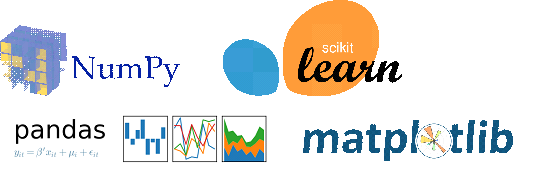

##**Computer Vision Modules:**
####**Opencv:**
OpenCV is a library of programming functions mainly aimed at real-time computer vision.
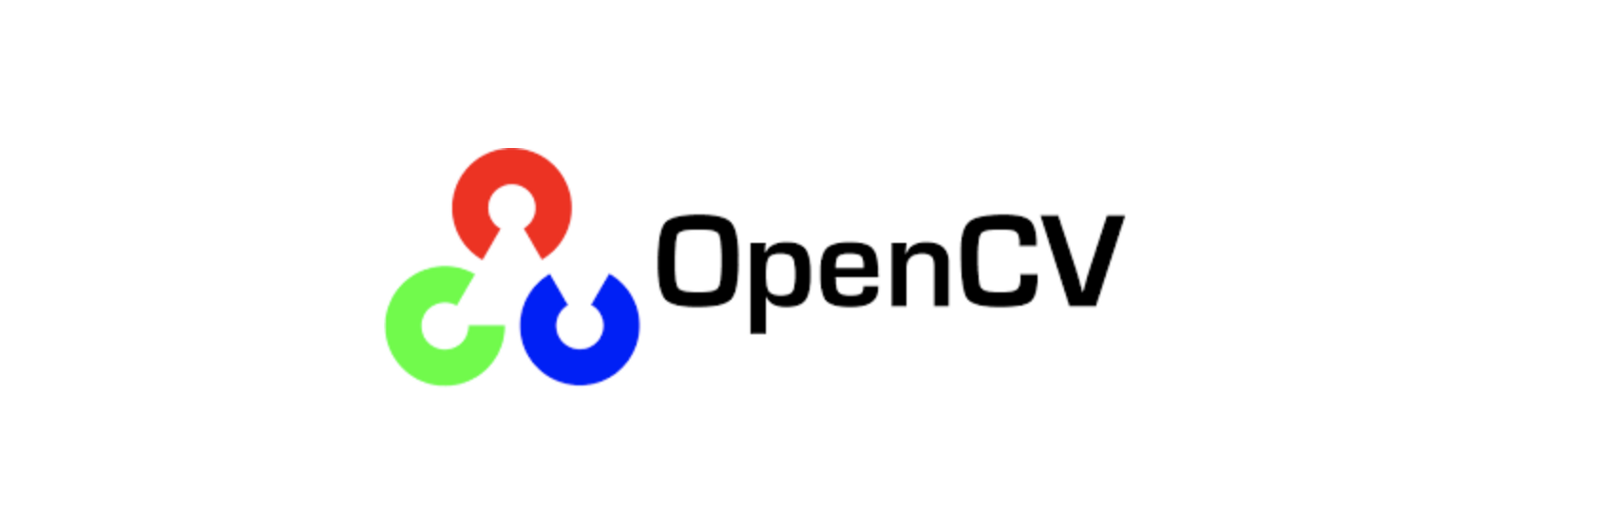

####**SIFT/SURF:**
Local feature detector and descriptor. It can be used for tasks such as object recognition, image registration, classification, or 3D reconstruction.


###**SOURCE CODE:**

In [ ]:
# Model training
import numpy as np
import cv2
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os

In [ ]:
path_train = "C://Users//anku_//Desktop//train"


val_path ="C://Users//anku_//Desktop//test"

In [ ]:
train_gen_data = ImageDataGenerator(rescale=1./255)
val_gen_data = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_gen_data.flow_from_directory(
        path_train,
        target_size=(48,48),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:

validation_generator = val_gen_data.flow_from_directory(
        val_path,
        target_size=(48,48),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
model_emo_detection = Sequential()

In [ ]:
model_emo_detection.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_emo_detection.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_emo_detection.add(MaxPooling2D(pool_size=(2, 2)))
model_emo_detection.add(Dropout(0.25))

In [ ]:
model_emo_detection.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo_detection.add(MaxPooling2D(pool_size=(2, 2)))
model_emo_detection.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo_detection.add(MaxPooling2D(pool_size=(2, 2)))
model_emo_detection.add(Dropout(0.25))

model_emo_detection.add(Flatten())
model_emo_detection.add(Dense(1024, activation='relu'))
model_emo_detection.add(Dropout(0.5))
model_emo_detection.add(Dense(7, activation='softmax'))

In [ ]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}


model_emo_detection.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model_emo_detection_info = model_emo_detection.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)
model_emo_detection.save_weights('C://Users//anku_//Desktop//model_emo_detection.h5')

Epoch 1/50
448/448 [==============================] - 93s 207ms/step - loss: 1.8266 - accuracy: 0.2455 - val_loss: 1.7414 - val_accuracy: 0.3039
Epoch 2/50
448/448 [==============================] - 95s 213ms/step - loss: 1.6804 - accuracy: 0.3398 - val_loss: 1.5490 - val_accuracy: 0.4042
Epoch 3/50
448/448 [==============================] - 96s 213ms/step - loss: 1.5531 - accuracy: 0.4044 - val_loss: 1.4742 - val_accuracy: 0.4348
Epoch 4/50
448/448 [==============================] - 96s 213ms/step - loss: 1.4857 - accuracy: 0.4261 - val_loss: 1.4072 - val_accuracy: 0.4637
Epoch 5/50
448/448 [==============================] - 96s 214ms/step - loss: 1.4120 - accuracy: 0.4605 - val_loss: 1.3654 - val_accuracy: 0.4802
Epoch 6/50
448/448 [==============================] - 96s 213ms/step - loss: 1.3598 - accuracy: 0.4854 - val_loss: 1.3165 - val_accuracy: 0.5071
Epoch 7/50
448/448 [==============================] - 95s 212ms/step - loss: 1.3230 - accuracy: 0.4947 - val_loss: 1.2819 - val_ac

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    bounding_box = cv2.CascadeClassifier('C://Users//anku_//Desktop//haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h), (255, 255, 0), 1)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        emo_pred = model_emo_detection.predict(cropped_img)
        maxindex = int(np.argmax(emo_pred))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1200,860),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
#using the model 
model_emo_detection = Sequential()

model_emo_detection.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_emo_detection.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_emo_detection.add(MaxPooling2D(pool_size=(2, 2)))
model_emo_detection.add(Dropout(0.25))

model_emo_detection.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo_detection.add(MaxPooling2D(pool_size=(2, 2)))
model_emo_detection.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_emo_detection.add(MaxPooling2D(pool_size=(2, 2)))
model_emo_detection.add(Dropout(0.25))

model_emo_detection.add(Flatten())
model_emo_detection.add(Dense(1024, activation='relu'))
model_emo_detection.add(Dropout(0.5))
model_emo_detection.add(Dense(7, activation='softmax'))
model_emo_detection.load_weights("C://Users//anku_//Desktop//emotion_mode.h5")

cv2.ocl.setUseOpenCL(False)

In [ ]:
cv2.ocl.setUseOpenCL(False)

emotion_dict = {0: "   Angry   ", 1: "Disgusted", 2: "  Fearful  ", 3: "   Happy   ", 4: "  Neutral  ", 5: "    Sad    ", 6: "Surprised"}


emoji_path_dict={0:".C://Users//anku_//Desktop//MOJIS//angry.png",2:".C://Users//anku_//Desktop//MOJIS//disgusted.png",2:".C://Users//anku_//Desktop//MOJIS//fearful.png",3:".C://Users//anku_//Desktop//MOJIS//happy.png",4:".C://Users//anku_//Desktop//MOJIS//neutral.png",5:".C://Users//anku_//Desktop//MOJIS//sad.png",6:".C://Users//anku_//Desktop//MOJIS//surpriced.png"}

In [ ]:
global last_frame1                                    
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1
show_text=[0]

In [ ]:
def video_disp_1():      
    cap1 = cv2.VideoCapture(0)                                 
    if not cap1.isOpened():                             
        print("cant open the camera1")
    flag1, frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(600,500))
    bounding_box = cv2.CascadeClassifier('C://Users//anku_//Desktop//haarcascade_frontalface_default.xml')

#     bounding_box = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        prediction = model_emo_detection.predict(cropped_img)
        
        maxindex = int(np.argmax(prediction))
        # cv2.putText(frame1, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex
    if flag1 is None:
        print ("Major error!")
    elif flag1:
        global last_frame1
        last_frame1 = frame1.copy()
        pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)     
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(10, video_disp_1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        exit()

In [ ]:
def video_disp_2():
    frame2=cv2.imread(emoji_path_dict[show_text[0]])
    pic2=cv2.cvtColor(frame2,cv2.COLOR_BGR2RGB)
    img2=Image.fromarray(frame2)
    imgtk2=ImageTk.PhotoImage(image=img2)
    lmain2.imgtk2=imgtk2
    lmain3.configure(text=emotion_dict[show_text[0]],font=('arial',45,'bold'))
    
    lmain2.configure(image=imgtk2)
    lmain2.after(10, video_disp_2)

In [ ]:
if __name__ == '__main__':
    root=tk.Toplevel()   
    
    heading2=Label(root,text="Photo to Emoji",pady=20, font=('arial',45,'bold'),bg='black',fg='#CDCDCD')                                 
    
    heading2.pack()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)

    lmain3=tk.Label(master=root,bd=10,fg="#CDCDCD",bg='black')
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=250)
    lmain3.pack()
    lmain3.place(x=960,y=250)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=900,y=350)
    


    root.title("Photo To Emoji")            
    root.geometry("1400x900+100+10") 
    root['bg']='black'
    exitbutton = Button(root, text='Quit',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    video_disp_1()
    video_disp_2()
    root.mainloop()

###**RESULTS:**

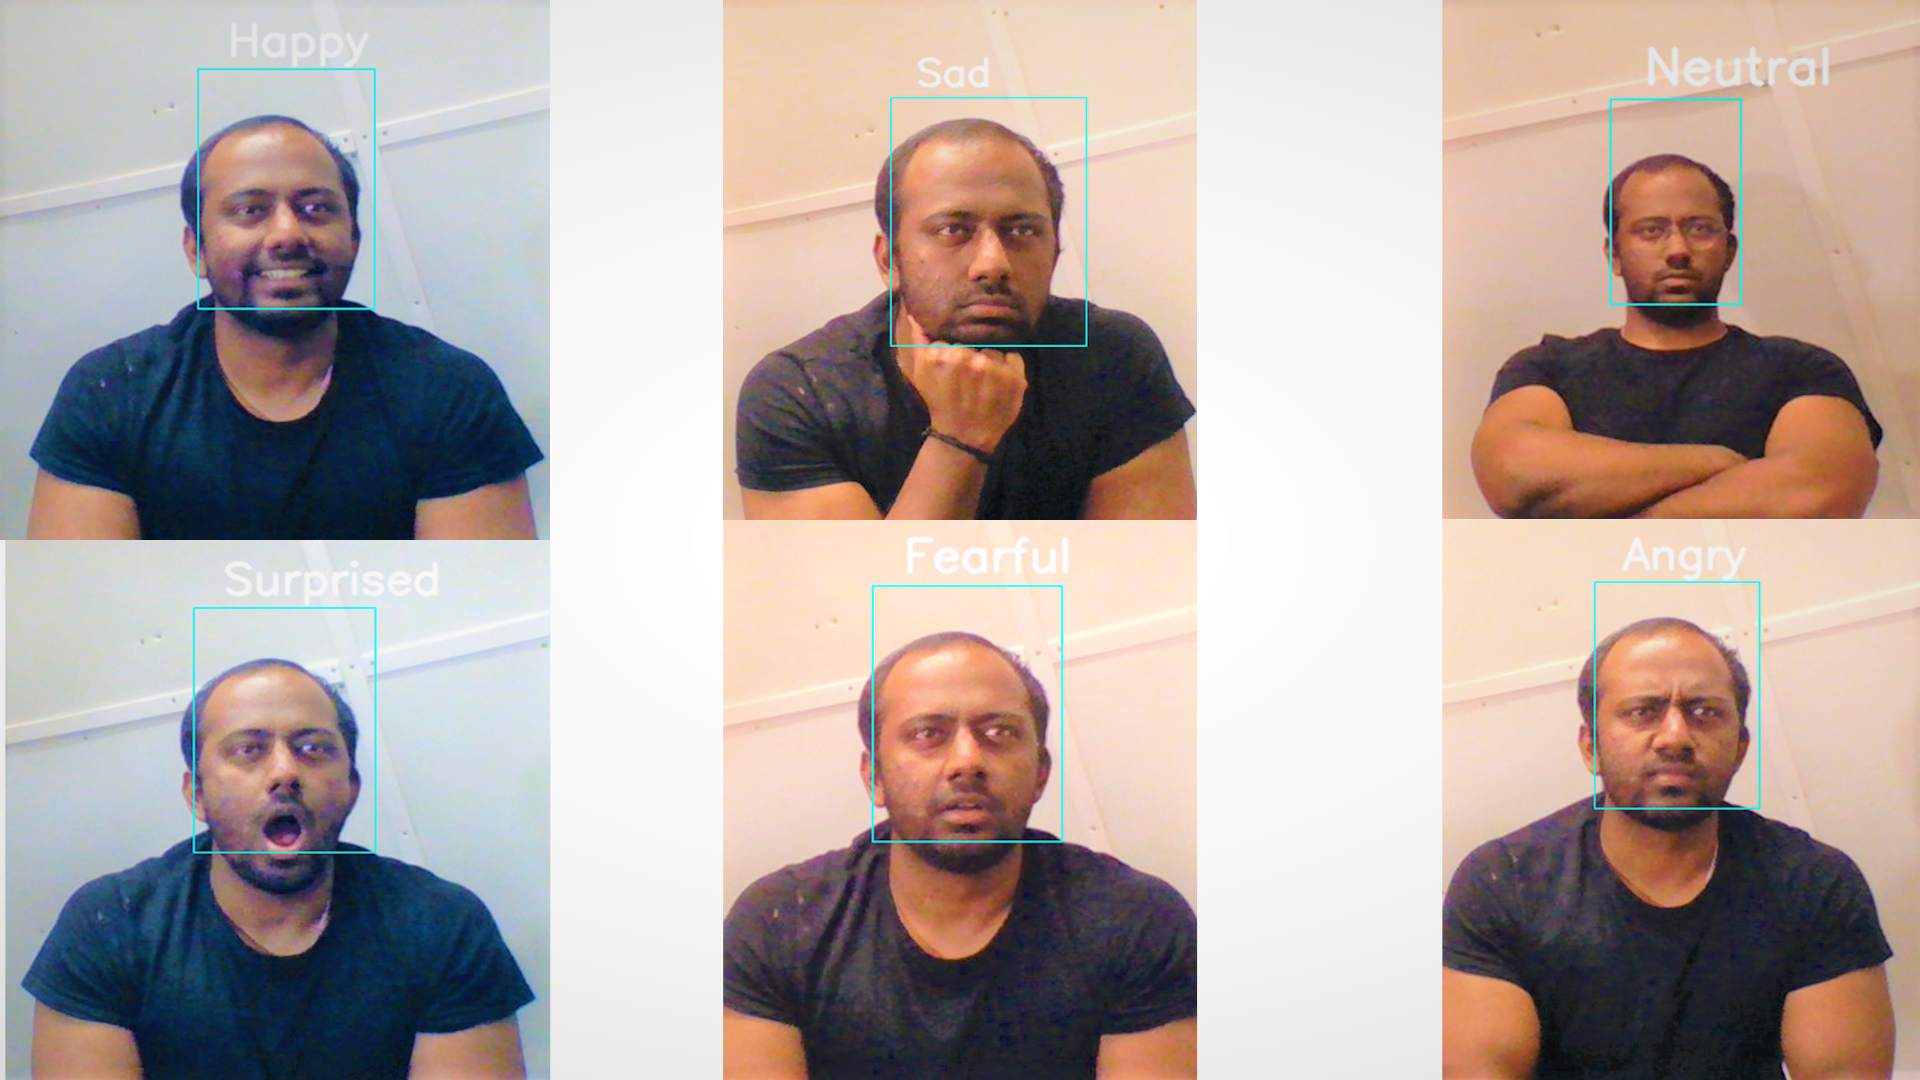

Output Video:
https://drive.google.com/file/d/1VLhBT4O6yv_9_rMnc8ckkDHZIiQDUlmf/view?usp=sharing

###**DISCUSSION and CHALLENGES:**
- Since the dataset was so large and training the model with 50epochs took too much time and GPU to train the model. It took 4-5hours to train the model in google colab GPU and 1hour to train the model on my system.
- And with tweaking the dataset and numbe rof epochs the model accuracy was not that good.
- I used my own Snapchat Bitmoji's to map emoji's to real time face emotion detection.


###**FUTURE WORK:**
- As of now am obtaining results but the accuracy of the model is not that much I would like to continue on this project to make it more accurate.
- Include emojis instead of reaction text above the bounding box.
- Once the model is completely trained I would like to test it over zoom calls or meetings.
- Training the model with more face expressions or hand gestures.

###**REFERENCES:**
1. https://machinelearningmastery.com/introduction-to-deep-learning-for-face-recognition/
2. https://data-flair.training/blogs/create-emoji-with-deep-learning/
3. https://machinelearningmastery.com/save-load-keras-deep-learning-models/
4. https://towardsdatascience.com/computer-vision-detecting-objects-using-haar-cascade-classifier-4585472829a9
5. https://stackoverflow.com/questions/21104664/extract-all-bounding-boxes-using-opencv-python
6. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


###**ETHICS ESSAY:**

**Introduction:**
###### “With great power comes great responsibility” 
Artificial Intelligence is nowadays booming in every industry. From finance to automobile, from healthcare to sports every industry is now focusing on AI and how they can make more opportunities in the market with the latest AI technologies.While some of the people support it, others despise it, Corporates, Industries and Educational Institutions are welcoming AI and using its applications everywhere on the other hand labours and manufacturers are not happy with the automation as it will make more people unemployed. 

As I said with great power comes great responsibility. Now as many companies in various fields are involving AI including healthcare and autonomous driving which directly links with life-and-death decisions of the user as well as the other citizens. Ai in healthcare can cause serious damage to the patient if the AI is not trained well. Such decisions where human life is in risk we should consider AI ethics and ethical ways to use and operate AI in such fields.

Autonomous Driving is a hot topic in the current market. Everyone is talking about the future of autonomous driving or driverless driving. Autonomous driving refers to self-driving cars that are capable of sensing and observing the environment and driving with no human input. The problem in autonomous driving is since from a very long time companies are training their model but still we hear the case of accidents and fatality. And without 100% accuracy or training companies just started selling the driver less cars concept to make a lead in the market which raises questions about the ethical way of business with AI. Autonomous driving will also make the drivers unemployed.

######**Conclusion:**
From autonomous vehicles to automated manufacturing, artificial intelligence is booming in each and every field, but along with the growth it also raises many concerns for humanity. But automating everything from AI music to AI news, from AI programmers to automated machines will lead to unemployment which can be a bigger cause of poverty and unstability in a nation.

